## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/raw/heart_disease_dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [99]:
data.columns

Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History',
       'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar',
       'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease'],
      dtype='object')

The dataset is largely complete, with missing values observed only in the
**Alcohol Intake** feature. All other variables are fully populated.
Given the categorical nature of this feature, missing values will be
handled during preprocessing using appropriate imputation techniques.


## Univariate Analysis
### Numeric Feature Distributions

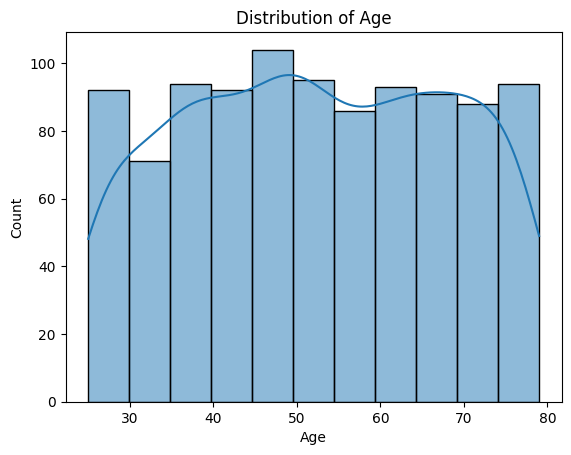

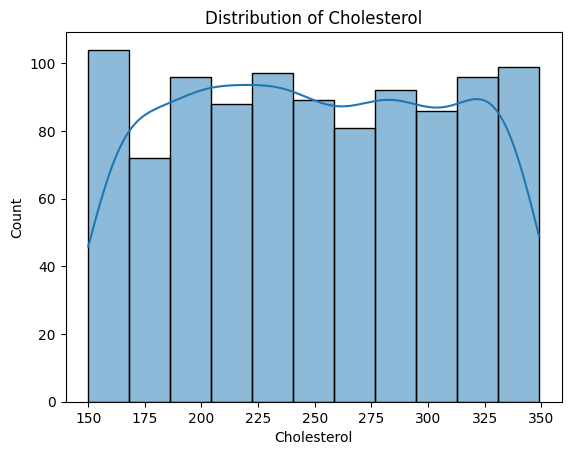

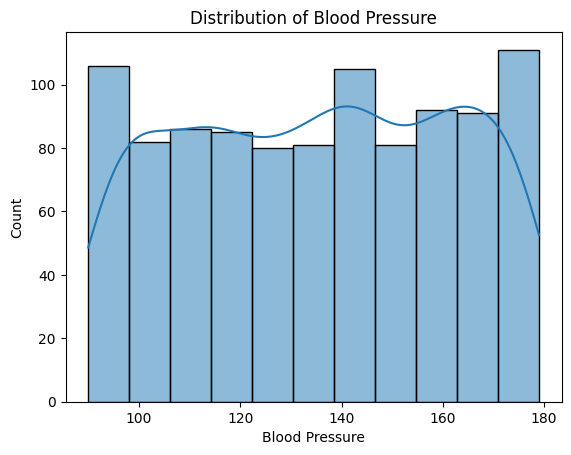

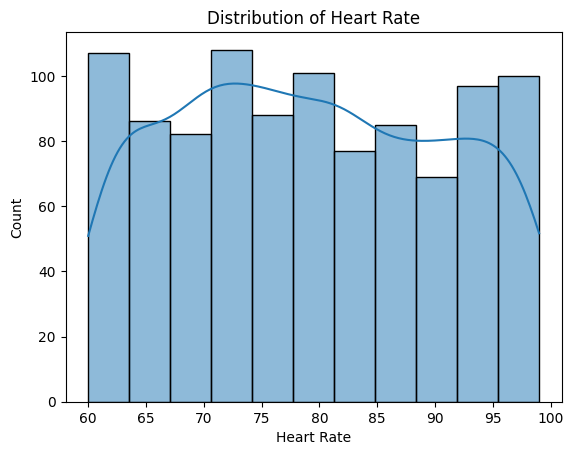

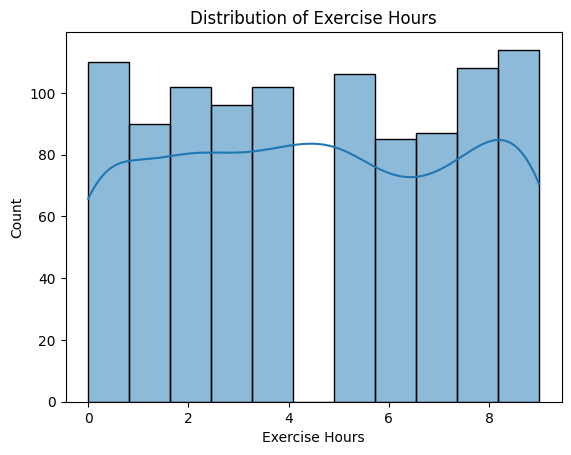

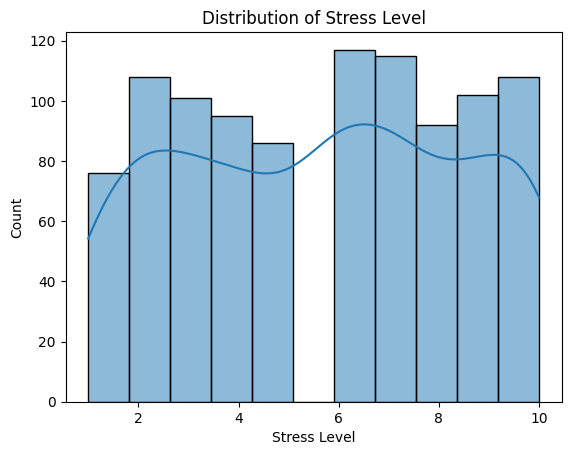

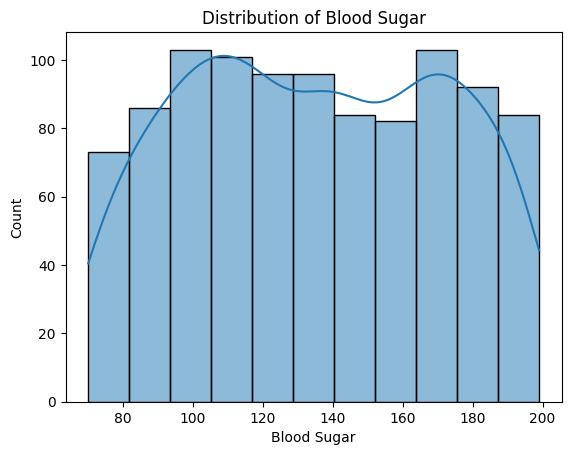

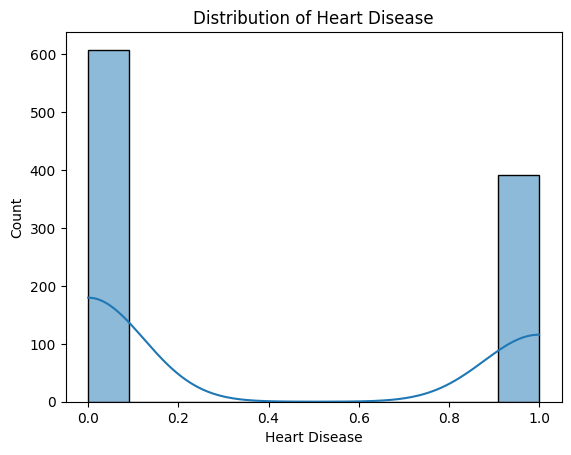

In [90]:
numeric_cols = data.select_dtypes(include="int64").columns

for col in numeric_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


## Categorical Feature Distribution (Percentage)

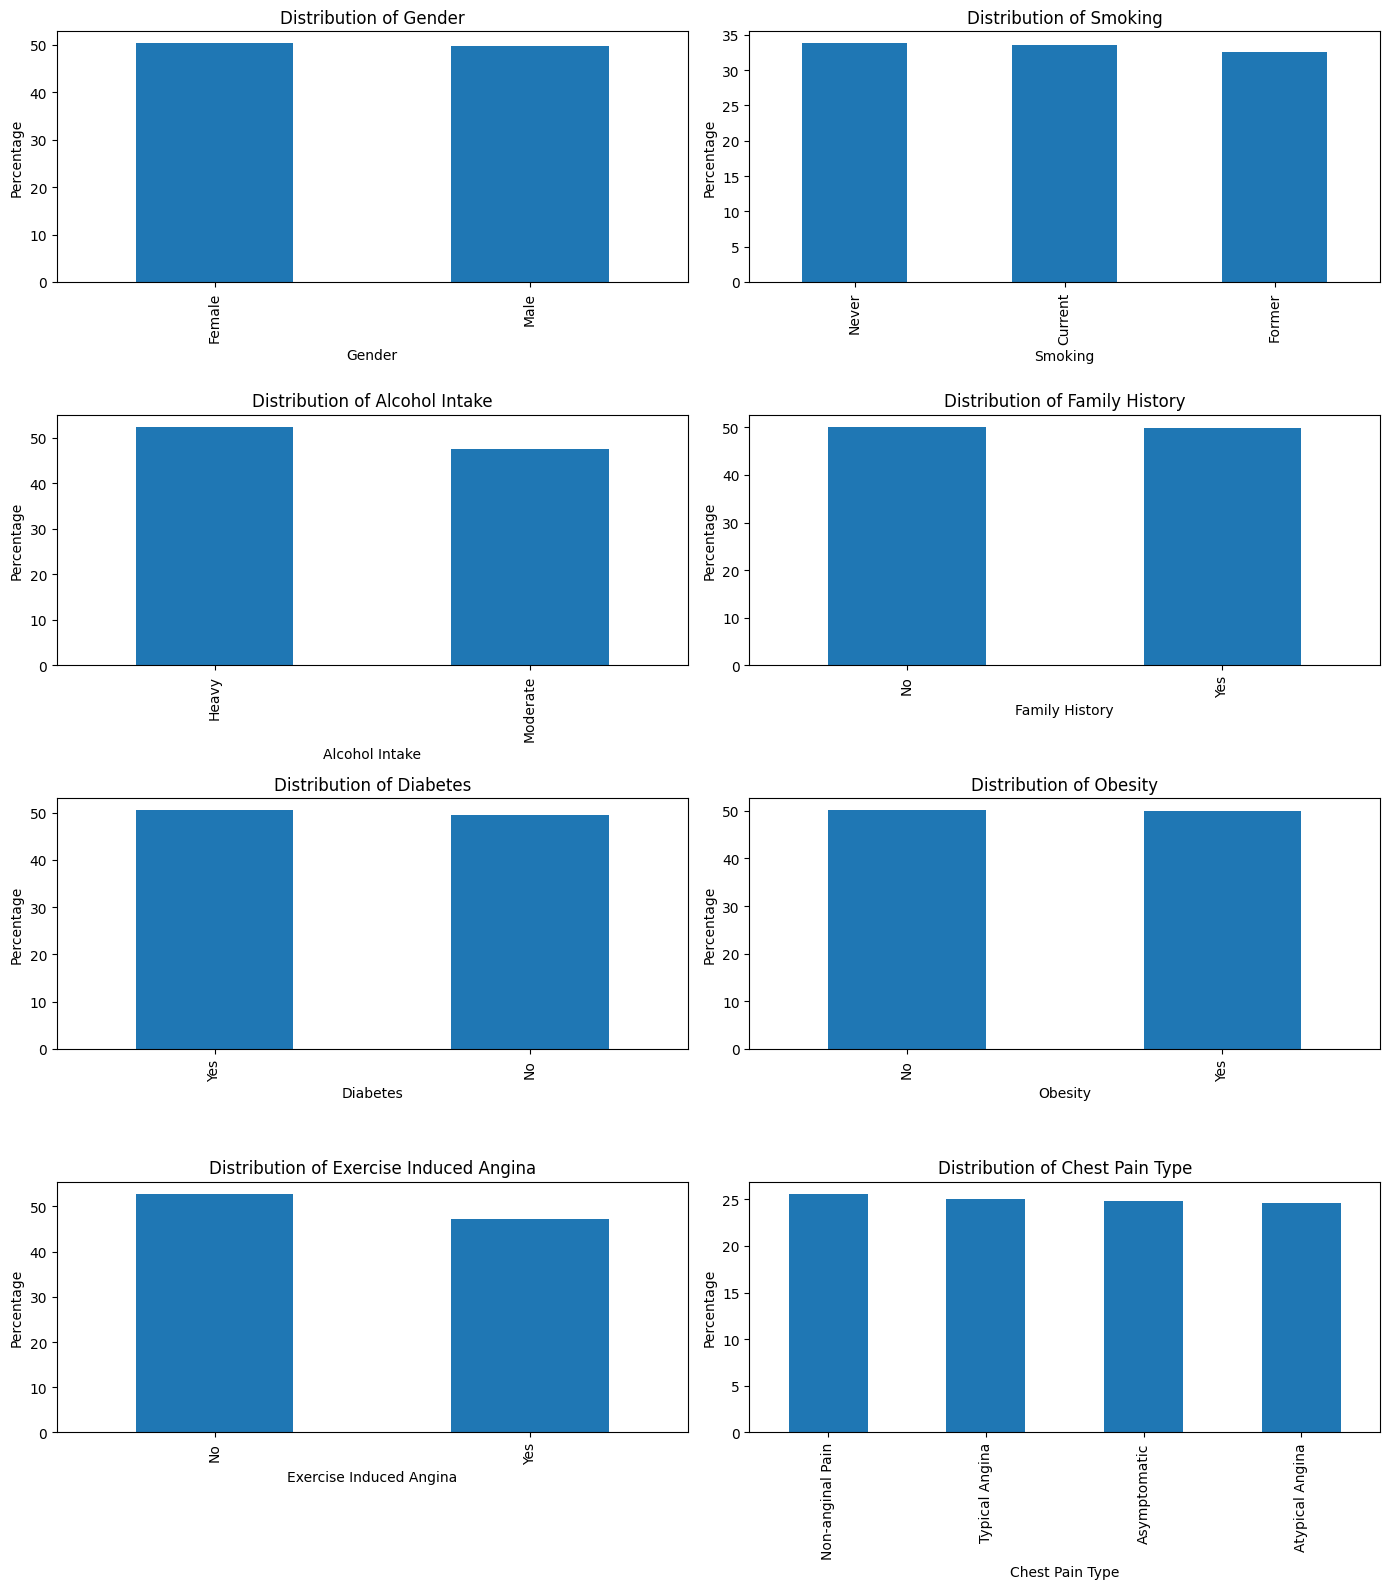

In [93]:
import math
cat_cols = data.select_dtypes(include="object").columns

n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    (data[col].value_counts(normalize=True) * 100).plot(
        kind="bar",
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("Percentage")

# Remove empty plots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Categorical variables such as smoking status, diabetes, and obesity show
balanced distributions, while others such as alcohol intake exhibit slight
class imbalance.


### Target Variable Analysis

In [13]:
data['Heart Disease'].value_counts()

Heart Disease
0    608
1    392
Name: count, dtype: int64

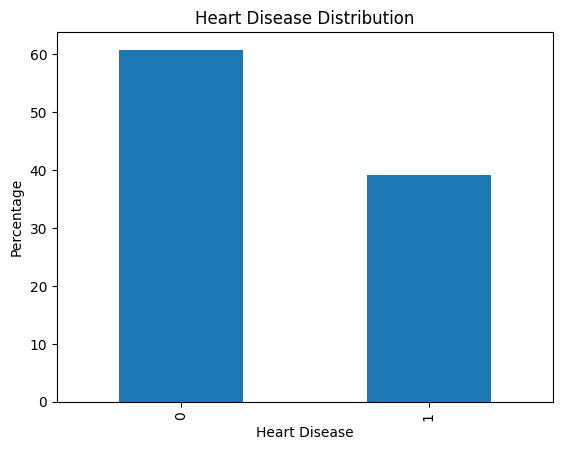

In [94]:
(data["Heart Disease"]
 .value_counts(normalize=True)
 .mul(100)
 .plot(kind="bar"))

plt.ylabel("Percentage")
plt.title("Heart Disease Distribution")
plt.show()


### Numeric features vs Target

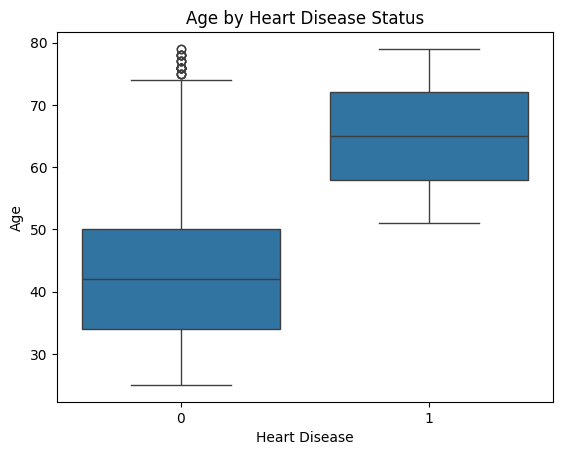

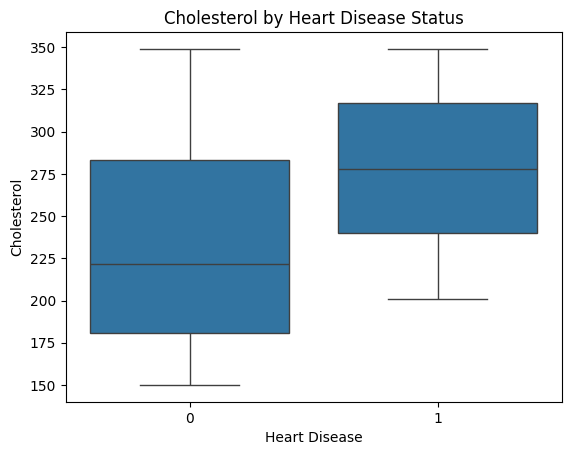

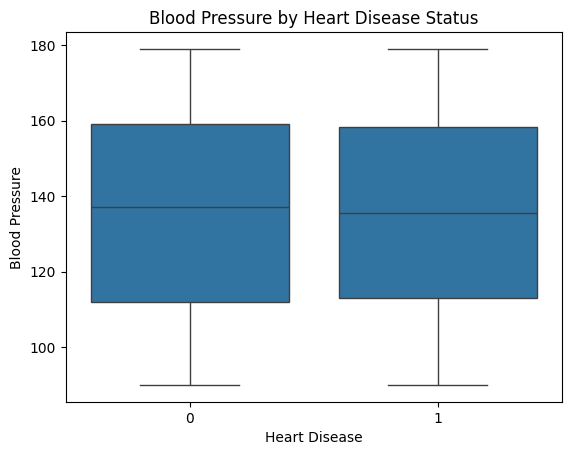

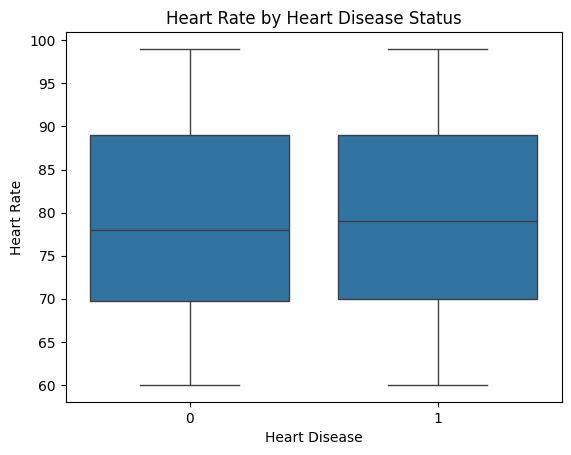

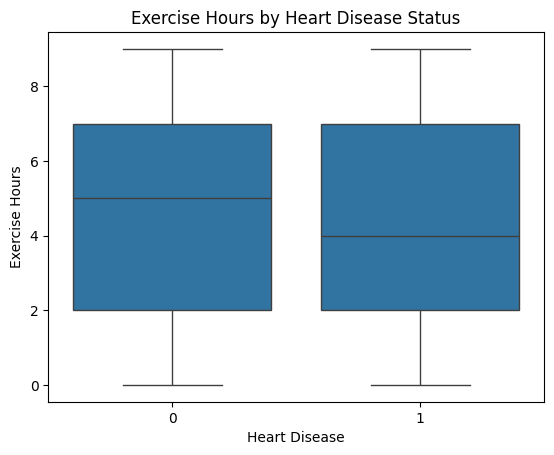

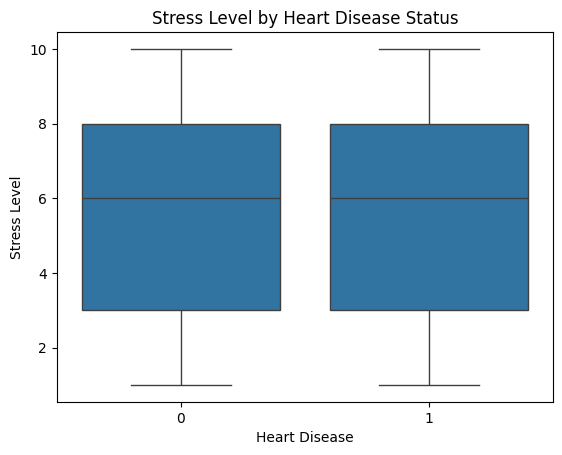

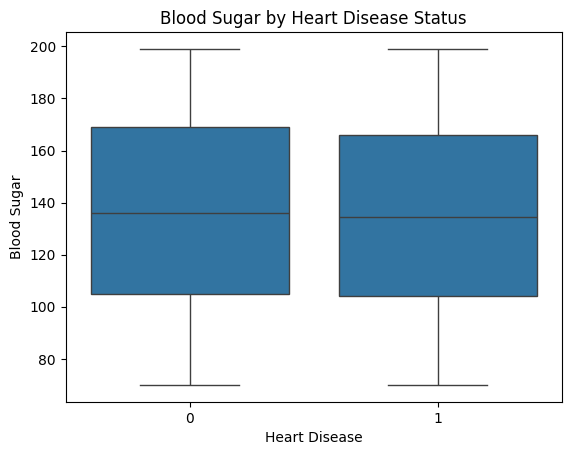

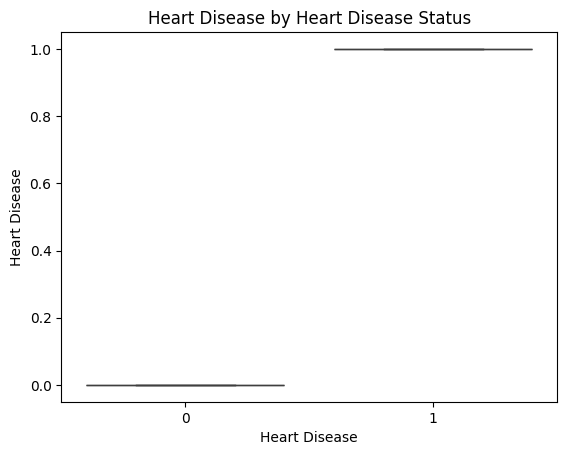

In [95]:
for col in numeric_cols:
    sns.boxplot(data=data, x="Heart Disease", y=col)
    plt.title(f"{col} by Heart Disease Status")
    plt.show()

----

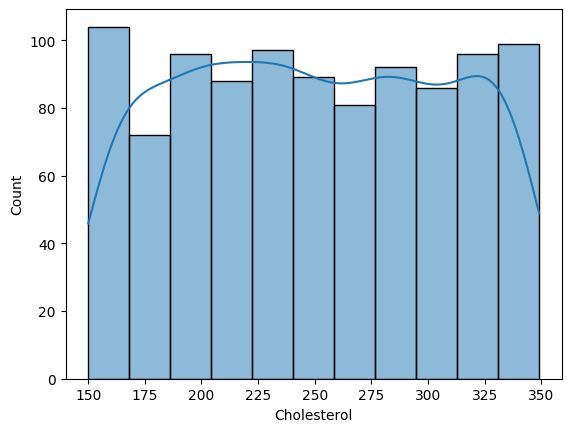

In [15]:
sns.histplot(x='Cholesterol', data=data, kde = True)
plt.show()

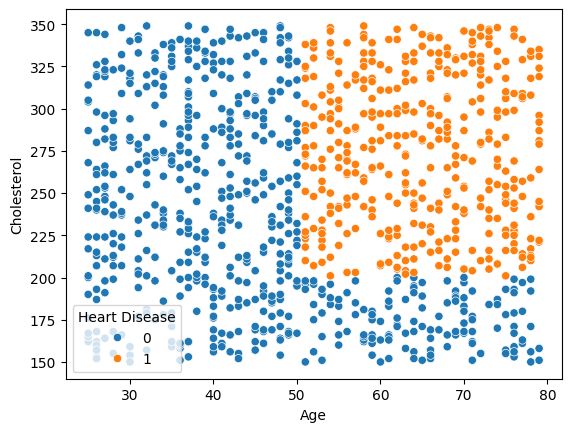

In [17]:
sns.scatterplot(x='Age', y='Cholesterol', data=data, hue = 'Heart Disease')
plt.show()

This visualization indicates that heart disease risk increases significantly with age.
While cholesterol levels show overlap between classes, combining age with other
clinical features is likely to improve predictive performance. If the age of the person is above 50 and has colestrol then it is obivous for him to get the heart disease.


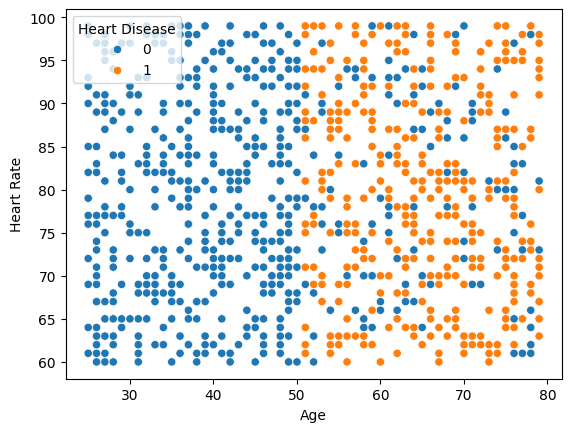

In [18]:
sns.scatterplot(x='Age', y='Heart Rate', data=data, hue = 'Heart Disease')
plt.show() 

Age is the primary differentiator
- A clear transition is observed around the 50-year age mark:
 - Individuals below 50 are predominantly free of heart disease.
 - Individuals above 50 show a substantially higher proportion of heart disease cases.
 - This reinforces the well-established medical understanding that age is one of the strongest risk factors for cardiovascular disease.

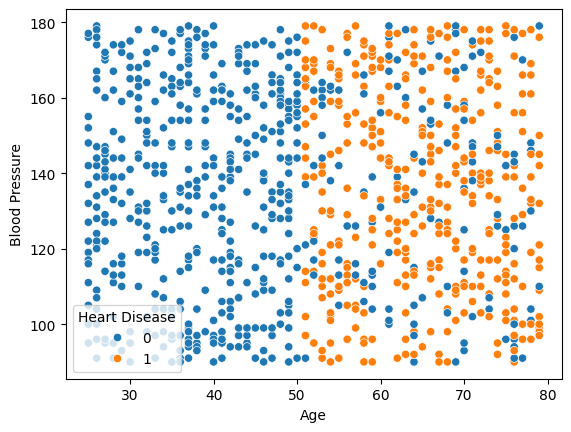

In [22]:
sns.scatterplot(x='Age', y='Blood Pressure', data=data, hue = 'Heart Disease')
plt.show()

In [29]:
data['Smoking'].value_counts()

Smoking
Never      338
Current    336
Former     326
Name: count, dtype: int64

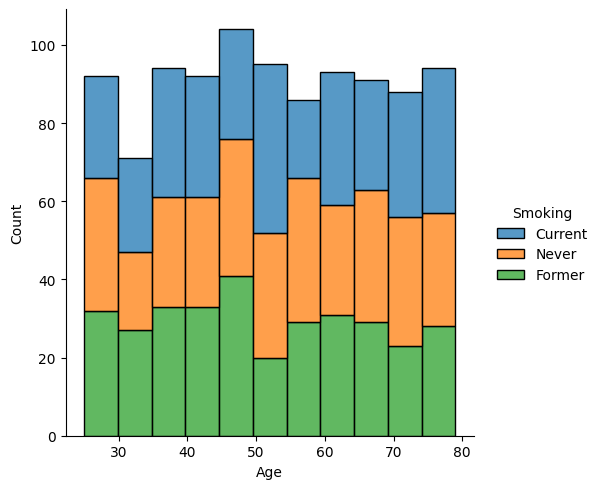

In [43]:
sns.displot(data=data, x="Age", hue="Smoking", multiple="stack")
plt.show()

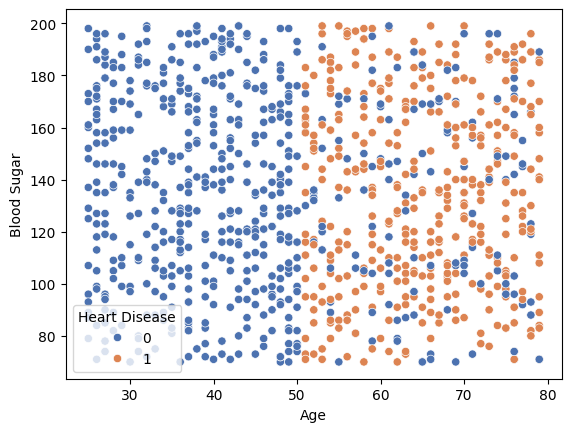

In [86]:
sns.scatterplot(x='Age', y='Blood Sugar', data=data, hue = 'Heart Disease',palette='deep')
plt.show()

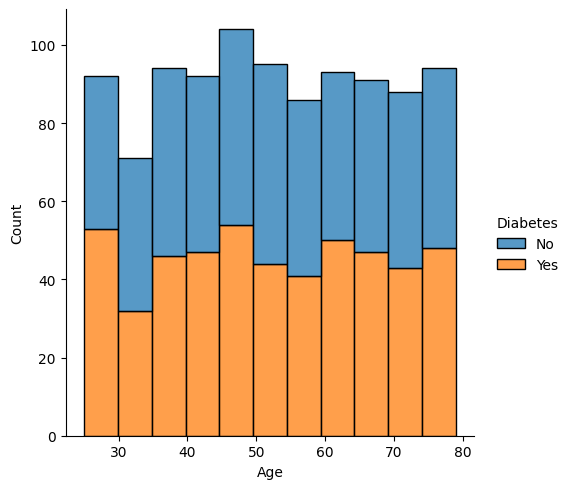

In [50]:
sns.displot(data=data, x="Age", hue="Diabetes", multiple="stack")
plt.show()

<Axes: xlabel='Age', ylabel='Family History'>

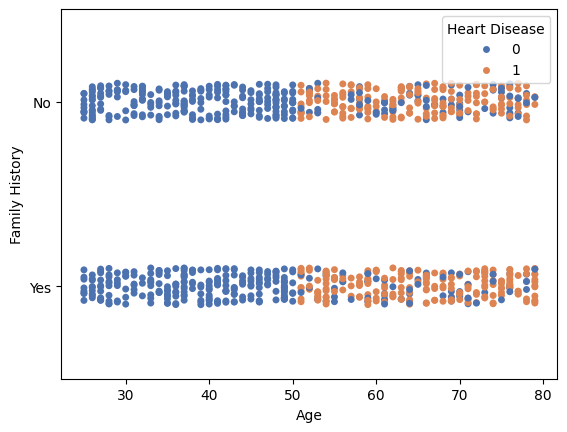

In [57]:
sns.stripplot(data=data, x="Age", y="Family History",hue = "Heart Disease", palette="deep")

In [58]:
data.columns

Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History',
       'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar',
       'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease'],
      dtype='object')

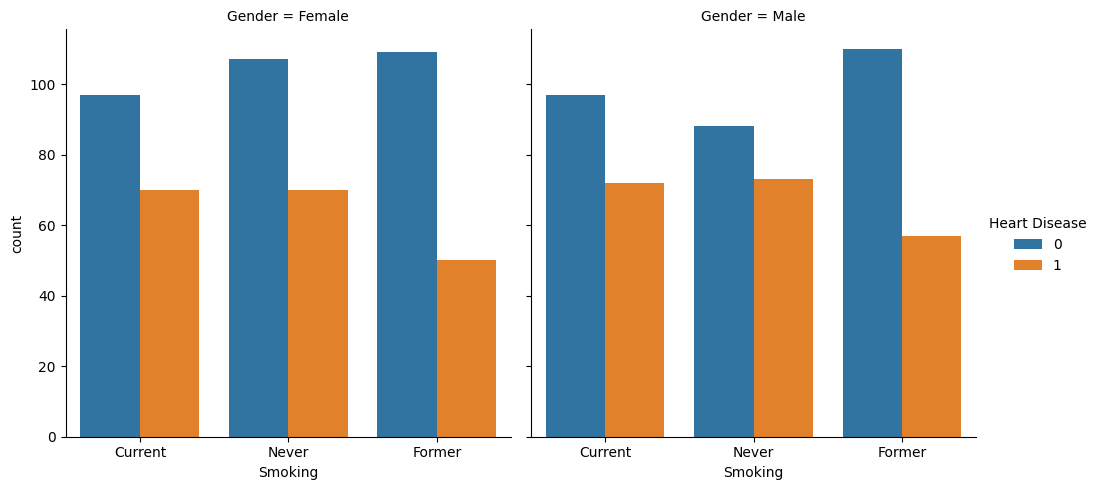

In [ ]:
sns.catplot(
    data=data,
    x="Smoking",
    hue="Heart Disease",
    col="Gender",
    kind="count"
)
plt.show()


- Heart disease in male is slightly higher than female

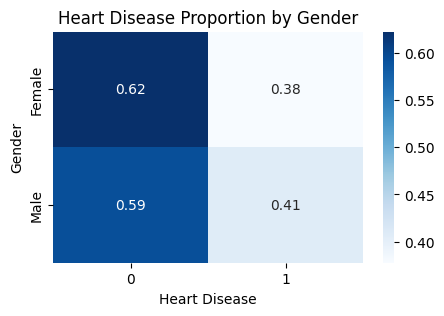

In [75]:
heatmap_df = pd.crosstab(
    data["Gender"],
    data["Heart Disease"],
    normalize="index"   # <-- normalize rows (per gender)
)

plt.figure(figsize=(5, 3))
sns.heatmap(
    heatmap_df,
    annot=True,
    cmap="Blues",
    fmt=".2f"
)

plt.title("Heart Disease Proportion by Gender")
plt.ylabel("Gender")
plt.xlabel("Heart Disease")
plt.show()

Heart disease prevalence is slightly higher in males
- Males: 41%
- Females: 38%
- Difference is present but not extreme
- The gap (~3%) suggests gender alone is not a strong predictor
- Other factors (age, cholesterol, diabetes, smoking) likely play a larger role

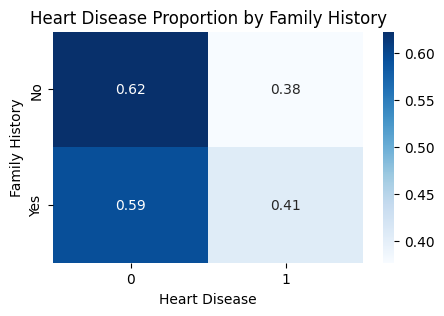

In [77]:
heatmap_df = pd.crosstab(
    data["Family History"],
    data["Heart Disease"],
    normalize="index"   # <-- normalize rows (per gender)
)

plt.figure(figsize=(5, 3))
sns.heatmap(
    heatmap_df,
    annot=True,
    cmap="Blues",
    fmt=".2f"
)

plt.title("Heart Disease Proportion by Family History")
plt.ylabel("Family History")
plt.xlabel("Heart Disease")
plt.show()

The heatmap illustrates heart disease prevalence stratified by family history.
Individuals with a family history of heart disease show a slightly higher prevalence
(41%) compared to those without a family history (38%). While family history is a
known risk factor, the modest difference indicates that heart disease risk is driven
by multiple interacting factors rather than heredity alone.


Family History (Yes / No)
Heart Disease (0 / 1)

In [87]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(
    data["Family History"],
    data["Heart Disease"]
)

contingency_table

Heart Disease,0,1
Family History,,
No,312,189
Yes,296,203


In [88]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value

(np.float64(0.7971914272189841), np.float64(0.371934415422823))

A chi-square test of independence was conducted to evaluate the
association between family history and heart disease.

The test yielded a chi-square statistic of 0.80 and a p-value of 0.37.
Since the p-value is greater than the 0.05 significance level, we fail
to reject the null hypothesis. This indicates that there is no
statistically significant association between family history and heart
disease in this dataset.

Although individuals with a family history show a slightly higher
prevalence of heart disease, the difference is not statistically
meaningful and may be attributed to random variation.


In [89]:
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
cramers_v


np.float64(0.02823457857342631)

---

### Statistical Testing

### Chi-Square Test(Categorical Variables)

In [96]:
from scipy.stats import chi2_contingency

chi_results = {}

for col in cat_cols:
    table = pd.crosstab(data[col], data["Heart Disease"])
    chi2, p, _, _ = chi2_contingency(table)
    chi_results[col] = p

chi_results


{'Gender': np.float64(0.38710086965037516),
 'Smoking': np.float64(0.016120667879371164),
 'Alcohol Intake': np.float64(0.059030190916708955),
 'Family History': np.float64(0.371934415422823),
 'Diabetes': np.float64(0.6465016409333123),
 'Obesity': np.float64(0.5945946066106533),
 'Exercise Induced Angina': np.float64(0.9507520461528501),
 'Chest Pain Type': np.float64(0.48847113933199393)}

1. Smoking is the ONLY statistically significant categorical predictor

p = 0.016 < 0.05

- Indicates a real association with heart disease
- Strong candidate feature for modeling

. Most categorical features show NO standalone significance

This does NOT mean:

They are useless ❌

They should be dropped automatically ❌

It means:

Their effect is not strong in isolation

They may work in combination with other variables (age, cholesterol, etc.)

In [97]:
from scipy.stats import ttest_ind

t_test_results = {}

for col in numeric_cols:
    g0 = data[data["Heart Disease"] == 0][col]
    g1 = data[data["Heart Disease"] == 1][col]
    _, p = ttest_ind(g0, g1)
    t_test_results[col] = p

t_test_results


c:\Users\sapan\OneDrive\Ambiente de Trabalho\Github\Heart-Disease-Prediction\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


{'Age': np.float64(1.3271300042774826e-119),
 'Cholesterol': np.float64(6.997974036120334e-33),
 'Blood Pressure': np.float64(0.8274823599500929),
 'Heart Rate': np.float64(0.6765316034156486),
 'Exercise Hours': np.float64(0.6532024886205208),
 'Stress Level': np.float64(0.8232789498163264),
 'Blood Sugar': np.float64(0.6812729457565907),
 'Heart Disease': np.float64(0.0)}

Decision rule (same as before):

`p ≤ 0.05 → statistically significant difference `

`p > 0.05 → no statistically significant difference `

1. Age is the strongest numeric predictor
- p-value is near zero
- Indicates a very large and consistent difference between groups
- Age should be considered a primary risk factor

2. Cholesterol is also a strong predictor
- Highly significant difference between heart disease groups
- Supports medical knowledge linking cholesterol to cardiovascular risk

Independent t-tests were performed to compare numeric features between
individuals with and without heart disease. Age and cholesterol levels
exhibited highly significant differences (p < 0.001), indicating strong
associations with heart disease occurrence.

In contrast, blood pressure, heart rate, exercise hours, stress level,
and blood sugar did not show statistically significant differences when
considered individually. These variables may still contribute to risk
through non-linear effects or interactions with other features.

Age and cholesterol were identified as the most influential numeric
predictors and were retained as key variables for downstream modeling.


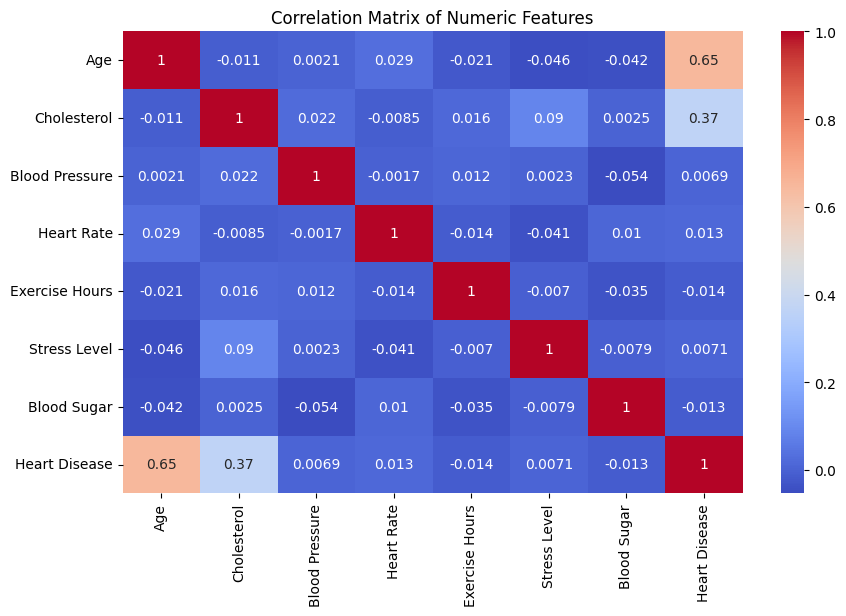

In [98]:
plt.figure(figsize=(10,6))
sns.heatmap(
    data[numeric_cols].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


Correlation analysis indicates that age and cholesterol have the strongest
positive correlations with heart disease. Moderate correlations were observed
among certain clinical features; however, no severe multicollinearity was
detected, supporting the inclusion of multiple predictors in downstream
models.


## Key Insights from Exploratory Analysis

- Age is the strongest predictor of heart disease, with risk increasing
  significantly after 50 years.
- Cholesterol levels show a strong and statistically significant association
  with heart disease.
- Smoking is the most influential categorical risk factor.
- Gender and family history exhibit weaker standalone effects.
- Most variables contribute modestly in isolation, reinforcing the
  multifactorial nature of cardiovascular disease.
- The dataset is well-structured and suitable for interpretable and
  predictive modeling.
